In [1]:
!pip install PyTDC


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\pahad\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
from tdc import utils
names = utils.retrieve_benchmark_names('ADMET_Group')


In [3]:
!pip install tensorflow deepchem


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\pahad\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [26]:
from tdc.multi_pred import DTI

data = DTI(name='BindingDB_Kd')
data.harmonize_affinities(mode='max_affinity')


Found local copy...
Loading...
Done!
The scale is in original affinity scale, so we will take the minimum!
The original data has been updated!


,Drug_ID,Drug,Target_ID,Target,Y
0,51.0,O=C(O)CCC(=O)C(=O)O,Q9GZT9,MANDSGGPGGPSPSERDRQYCELCGKMENLLRCSRCRSSFYCCKEH...,900.0
1,187.0,CC(=O)OCC[N+](C)(C)C,P11229,MNTSAPPAVSPNITVLAPGKGPWQVAFIGITTGLLSLATVTGNLLV...,17378.0
2,187.0,CC(=O)OCC[N+](C)(C)C,P58154,MRRNIFCLACLWIVQACLSLDRADILYNIRQTSRPDVIPTQRDRPV...,458.0
3,237.0,CCN(CC)CCCC(C)Nc1c2ccc(Cl)cc2nc2ccc(OC)cc12,P02752,MLRFAITLFAVITSSTCQQYGCLEGDTHKANPSPEPNMHECTLYSE...,264.0
4,242.0,O=C([O-])c1ccccc1,P14920,MRVVVIGAGVIGLSTALCIHERYHSVLQPLDIKVYADRFTPLTTTD...,2200.0
...,...,...,...,...,...
42231,138805907.0,COc1nc2ccc([C@@](O)(c3ccc(C(F)(F)F)nc3)c3cncn3...,P51449,MDRAPQRQHRASRELLAAKKTHTSQIEVIPCKICGDKSSGIHYGVI...,3.1
42232,138805908.0,COc1nc2ccc([C@](O)(c3ccnc(C(F)(F)F)c3)c3cncn3C...,P51449,MDRAPQRQHRASRELLAAKKTHTSQIEVIPCKICGDKSSGIHYGVI...,9300.0
42233,138805909.0,COc1nc2ccc([C@@](O)(c3ccnc(C(F)(F)F)c3)c3cncn3...,P51449,MDRAPQRQHRASRELLAAKKTHTSQIEVIPCKICGDKSSGIHYGVI...,3.5
42234,138805910.0,COc1nc2ccc([C@](O)(c3ccc(Cl)cc3)c3cncn3C)cc2c(...,P51449,MDRAPQRQHRASRELLAAKKTHTSQIEVIPCKICGDKSSGIHYGVI...,850.0


In [27]:
split = data.get_split()


Found local copy...
Loading...
Done!
The scale is in original affinity scale, so we will take the minimum!
The original data has been updated!


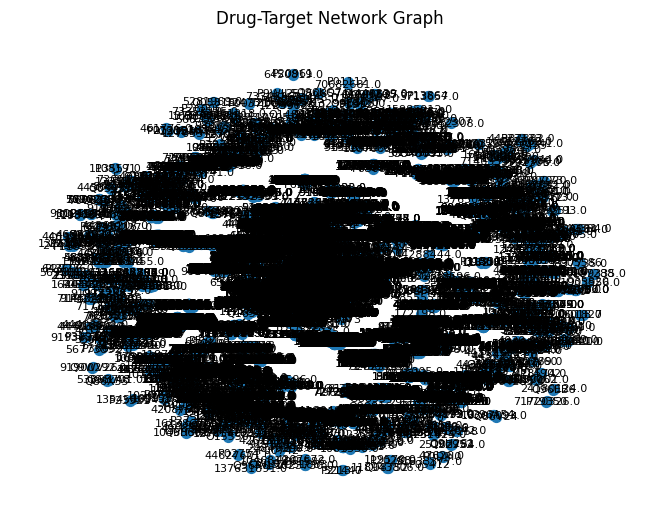

In [31]:
from tdc.multi_pred import DTI
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset and harmonize affinities
data = DTI(name='BindingDB_Kd')
data.harmonize_affinities(mode='max_affinity')

# Get the dataset split
split = data.get_split()

# Create a network graph
G = nx.Graph()

# Extract unique drugs and targets from the training split
unique_drugs = set(split['train']['Drug_ID'])
unique_targets = set(split['train']['Target_ID'])

# Add nodes for drugs and targets
for drug_id in unique_drugs:
    G.add_node(drug_id, node_type="drug")

for target_id in unique_targets:
    G.add_node(target_id, node_type="target")

# Add edges based on binding affinities from the training split
for index, row in split['train'].iterrows():
    drug_id = row['Drug_ID']
    target_id = row['Target_ID']
    affinity = row['Y']

    G.add_edge(drug_id, target_id, affinity=affinity)

# Visualize the network graph
pos = nx.spring_layout(G, seed=42)  # Layout algorithm for node positioning
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8)

# Optionally, customize the visualization further (e.g., color nodes by type, edge colors by affinity)
plt.title("Drug-Target Network Graph")
plt.show()


Found local copy...
Loading...
Done!
The scale is in original affinity scale, so we will take the minimum!
The original data has been updated!


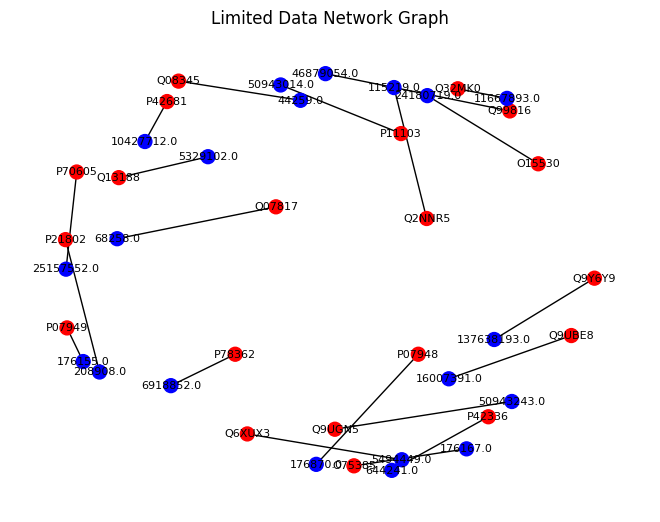

In [42]:
from tdc.multi_pred import DTI
import networkx as nx
import matplotlib.pyplot as plt
import random

# Load the dataset and harmonize affinities
data = DTI(name='BindingDB_Kd')
data.harmonize_affinities(mode='max_affinity')

# Get the dataset split
split = data.get_split()

# Create a network graph
G = nx.Graph()

# Define the number of data points you want to include (e.g., 15)
num_data_points_to_include = 20

# Randomly select a subset of data points (drugs and targets)
random.seed(42)  # Set a seed for reproducibility
sampled_data = random.sample(split['train'].to_dict('records'), num_data_points_to_include)

# Add nodes for drugs and targets
for data_point in sampled_data:
    drug_id = data_point['Drug_ID']
    target_id = data_point['Target_ID']
    
    G.add_node(drug_id, node_type="drug", color="blue", node_size=100)  # Make drug nodes blue and larger
    G.add_node(target_id, node_type="target", color="red", node_size=100)  # Make target nodes red and larger
    G.add_edge(drug_id, target_id)  # Connect the drug and target nodes

# Visualize the network graph
pos = nx.spring_layout(G, seed=42, k=0.8)  # Adjust the 'k' parameter for more distance between nodes
nx.draw(G, pos, with_labels=True, node_size=100, font_size=8, node_color=[G.nodes[n]['color'] for n in G.nodes])

# Optionally, customize the visualization further (e.g., color nodes by type)
plt.title("Limited Data Network Graph")
plt.show()


Found local copy...
Loading...
Done!
The scale is in original affinity scale, so we will take the minimum!
The original data has been updated!


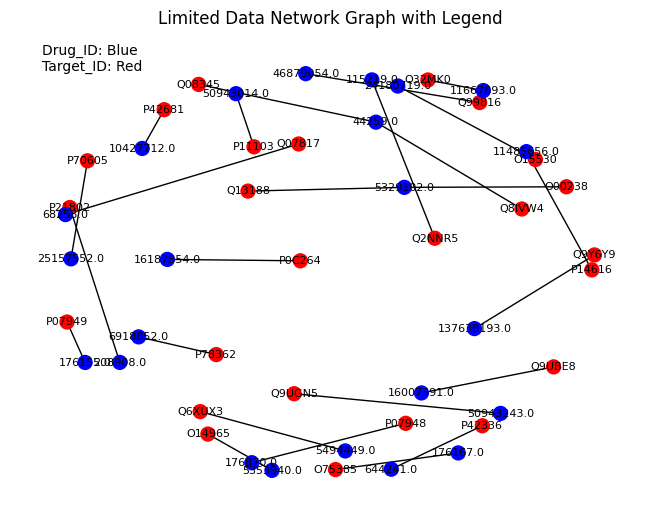

In [47]:
from tdc.multi_pred import DTI
import networkx as nx
import matplotlib.pyplot as plt
import random

# Load the dataset and harmonize affinities
data = DTI(name='BindingDB_Kd')
data.harmonize_affinities(mode='max_affinity')

# Get the dataset split
split = data.get_split()

# Create a network graph
G = nx.Graph()

# Define the number of data points you want to include (e.g., 20)
num_data_points_to_include = 25

# Randomly select a subset of data points (drugs and targets)
random.seed(42)  # Set a seed for reproducibility
sampled_data = random.sample(split['train'].to_dict('records'), num_data_points_to_include)

# Add nodes for drugs and targets
for data_point in sampled_data:
    drug_id = data_point['Drug_ID']
    target_id = data_point['Target_ID']
    
    G.add_node(drug_id, node_type="drug", color="blue", node_size=100)  # Make drug nodes blue and larger
    G.add_node(target_id, node_type="target", color="red", node_size=100)  # Make target nodes red and larger
    G.add_edge(drug_id, target_id)  # Connect the drug and target nodes

# Visualize the network graph
pos = nx.spring_layout(G, seed=42, k=0.8)  # Adjust the 'k' parameter for more distance between nodes
node_colors = [G.nodes[n]['color'] for n in G.nodes]

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=100, font_size=8, node_color=node_colors)

# Add legend to the corner of the graph
legend_labels = {"Drug_ID": "Blue", "Target_ID": "Red"}
plt.text(0.05, 0.92, "\n".join([f"{label}: {color}" for label, color in legend_labels.items()]), transform=plt.gca().transAxes)

# Optionally, customize the visualization further (e.g., color nodes by type)
plt.title("Limited Data Network Graph with Legend")
plt.show()


Found local copy...
Loading...
Done!
The scale is in original affinity scale, so we will take the minimum!
The original data has been updated!


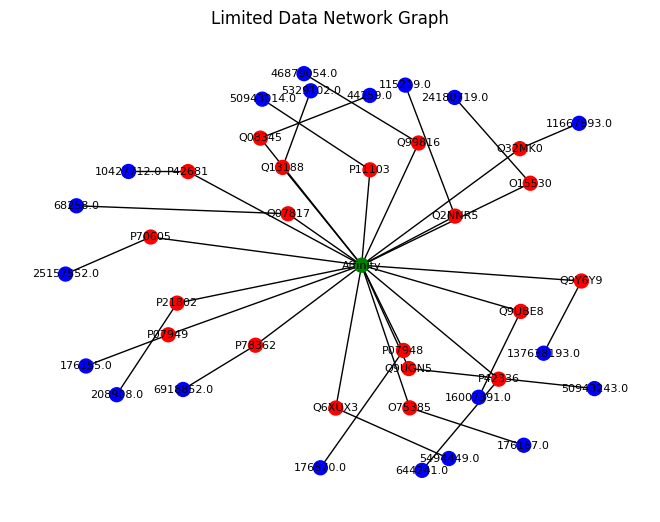

In [50]:
from tdc.multi_pred import DTI
import networkx as nx
import matplotlib.pyplot as plt
import random

# Load the dataset and harmonize affinities
data = DTI(name='BindingDB_Kd')
data.harmonize_affinities(mode='max_affinity')

# Get the dataset split
split = data.get_split()

# Create a network graph
G = nx.Graph()

# Define the number of data points you want to include (e.g., 15)
num_data_points_to_include = 20

# Randomly select a subset of data points (drugs and targets)
random.seed(42)  # Set a seed for reproducibility
sampled_data = random.sample(split['train'].to_dict('records'), num_data_points_to_include)

# Add nodes for drugs and targets
for data_point in sampled_data:
    drug_id = data_point['Drug_ID']
    target_id = data_point['Target_ID']
    
    G.add_node(drug_id, node_type="drug", color="blue", node_size=100)  # Make drug nodes blue and larger
    G.add_node(target_id, node_type="target", color="red", node_size=100)  # Make target nodes red and larger
    G.add_edge(drug_id, target_id)  # Connect the drug and target nodes

# Add a node for affinity (e.g., average affinity of all data points)
average_affinity = sum(data_point['Y'] for data_point in sampled_data) / num_data_points_to_include
G.add_node("Affinity", node_type="affinity", color="green", node_size=100)  # Make affinity node green and larger

# Connect the affinity node to all target nodes
for target_id in set(data_point['Target_ID'] for data_point in sampled_data):
    G.add_edge("Affinity", target_id)

# Visualize the network graph
pos = nx.spring_layout(G, seed=42, k=0.8)  # Adjust the 'k' parameter for more distance between nodes
node_colors = [G.nodes[n]['color'] for n in G.nodes]
node_sizes = [G.nodes[n]['node_size'] for n in G.nodes]
nx.draw(G, pos, with_labels=True, node_size=node_sizes, font_size=8, node_color=node_colors)

# Optionally, customize the visualization further (e.g., color nodes by type)
plt.title("Limited Data Network Graph")
plt.show()


Found local copy...
Loading...
Done!
The scale is in original affinity scale, so we will take the minimum!
The original data has been updated!


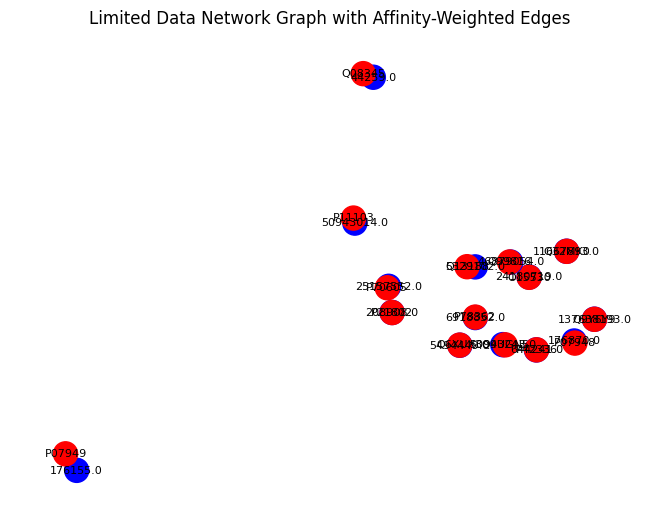

In [64]:
import random
from tdc.multi_pred import DTI
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset and harmonize affinities
data = DTI(name='BindingDB_Kd')
data.harmonize_affinities(mode='max_affinity')

# Get the dataset split
split = data.get_split()

# Create a network graph
G = nx.Graph()

# Define the number of data points you want to include
num_data_points_to_include = 15

# Randomly select a subset of data points (drugs and targets)
random.seed(42)  # Set a seed for reproducibility
sampled_data = random.sample(split['train'].to_dict('records'), num_data_points_to_include)

# Add nodes for drugs and targets
for data_point in sampled_data:
    drug_id = data_point['Drug_ID']
    target_id = data_point['Target_ID']
    affinity = data_point['Y']

    G.add_node(drug_id, node_type="drug", color="blue")  # Make drug nodes blue
    G.add_node(target_id, node_type="target", color="red")  # Make target nodes red
    # Add weighted edges based on affinity
    G.add_edge(drug_id, target_id, weight=affinity)

# Visualize the network graph
pos = nx.spring_layout(G, seed=42)  # Use a layout for positioning nodes

# Normalize the affinity values to determine edge thickness
edge_weights = [G[u][v]['weight'] for u,v in G.edges()]
max_weight = max(edge_weights)
min_weight = min(edge_weights)
scaled_weights = [(weight - min_weight + 1) / (max_weight - min_weight + 1) * 10 for weight in edge_weights]

# Draw the graph with customized node colors and edge thickness
node_colors = [G.nodes[n]['color'] for n in G.nodes]
nx.draw(G, pos, with_labels=True, node_color=node_colors, width=scaled_weights, edge_color='black', font_size=8)

# Show the plot
plt.title("Limited Data Network Graph with Affinity-Weighted Edges")
plt.show()


Found local copy...
Loading...
Done!
The scale is in original affinity scale, so we will take the minimum!
The original data has been updated!


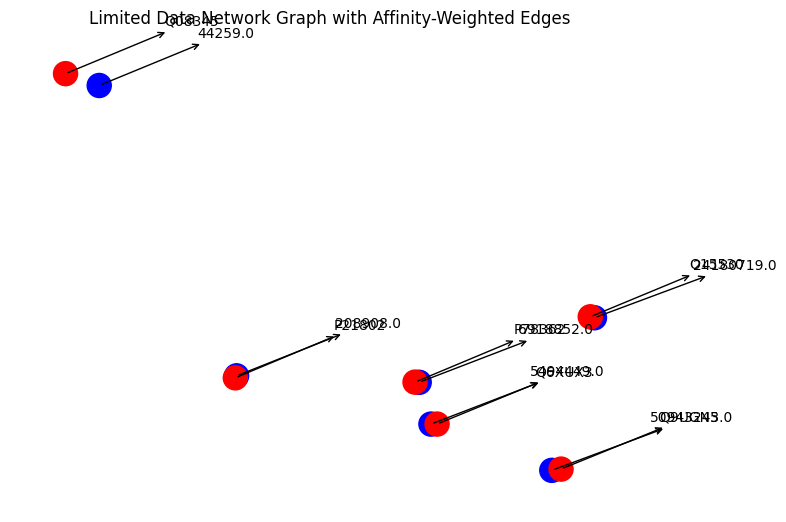

In [100]:
import random
from tdc.multi_pred import DTI
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset and harmonize affinities
data = DTI(name='BindingDB_Kd')
data.harmonize_affinities(mode='max_affinity')

# Get the dataset split
split = data.get_split()

# Create a network graph
G = nx.Graph()

# Define the number of data points you want to include
num_data_points_to_include = 6

# Randomly select a subset of data points (drugs and targets)
random.seed(42)  # Set a seed for reproducibility
sampled_data = random.sample(split['train'].to_dict('records'), num_data_points_to_include)

# Add nodes for drugs and targets
for data_point in sampled_data:
    drug_id = data_point['Drug_ID']
    target_id = data_point['Target_ID']
    affinity = data_point['Y']

    G.add_node(drug_id, node_type="drug", color="blue")  # Make drug nodes blue
    G.add_node(target_id, node_type="target", color="red")  # Make target nodes red
    # Add weighted edges based on affinity
    G.add_edge(drug_id, target_id, weight=affinity)

# Visualize the network graph
pos = nx.spring_layout(G, seed=42)  # Use a layout for positioning nodes

# Normalize the affinity values to determine edge thickness
edge_weights = [G[u][v]['weight'] for u,v in G.edges()]
max_weight = max(edge_weights)
min_weight = min(edge_weights)
scaled_weights = [(weight - min_weight + 1) / (max_weight - min_weight + 1) * 10 for weight in edge_weights]

# Draw the graph with customized node colors and edge thickness
node_colors = [G.nodes[n]['color'] for n in G.nodes]
nx.draw(G, pos, node_color=node_colors, width=scaled_weights, edge_color='black')

# Add labels with arrows pointing to nodes
for node, (x, y) in pos.items():
    plt.annotate(
        node, 
        xy=(x, y), xycoords='data',
        xytext=(x + 0.1, y + 0.18), textcoords='data',
        arrowprops=dict(arrowstyle="<-",
                        connectionstyle="arc3"),
    )

# Show the plot
plt.title("Limited Data Network Graph with Affinity-Weighted Edges")
plt.show()


Found local copy...
Loading...
Done!
The scale is in original affinity scale, so we will take the minimum!
The original data has been updated!


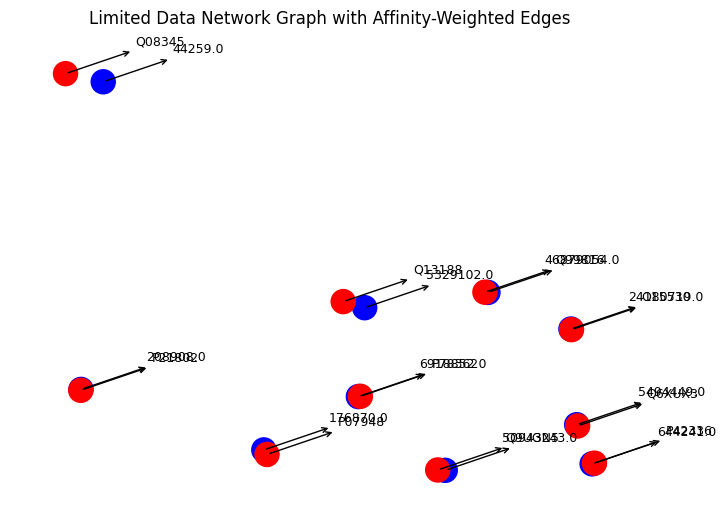

24180719.0: ['O15530']
O15530: [24180719.0]
208908.0: ['P21802']
P21802: [208908.0]
44259.0: ['Q08345']
Q08345: [44259.0]
50943243.0: ['Q9UGN5']
Q9UGN5: [50943243.0]
6918852.0: ['P78362']
P78362: [6918852.0]
5494449.0: ['Q6XUX3']
Q6XUX3: [5494449.0]
5329102.0: ['Q13188']
Q13188: [5329102.0]
644241.0: ['P42336']
P42336: [644241.0]
46879054.0: ['Q99816']
Q99816: [46879054.0]
176870.0: ['P07948']
P07948: [176870.0]


In [103]:
import random
from tdc.multi_pred import DTI
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset and harmonize affinities
data = DTI(name='BindingDB_Kd')
data.harmonize_affinities(mode='max_affinity')

# Get the dataset split
split = data.get_split()

# Create a network graph
G = nx.Graph()

# Define the number of data points you want to include
num_data_points_to_include = 10

# Randomly select a subset of data points (drugs and targets)
random.seed(42)  # Set a seed for reproducibility
sampled_data = random.sample(split['train'].to_dict('records'), num_data_points_to_include)

# Add nodes for drugs and targets
for data_point in sampled_data:
    drug_id = data_point['Drug_ID']
    target_id = data_point['Target_ID']
    affinity = data_point['Y']

    G.add_node(drug_id, node_type="drug", color="blue")  # Make drug nodes blue
    G.add_node(target_id, node_type="target", color="red")  # Make target nodes red
    # Add weighted edges based on affinity
    G.add_edge(drug_id, target_id, weight=affinity)

# Visualize the network graph
pos = nx.spring_layout(G, seed=42)  # Use a layout for positioning nodes

# Normalize the affinity values to determine edge thickness
edge_weights = [G[u][v]['weight'] for u,v in G.edges()]
max_weight = max(edge_weights)
min_weight = min(edge_weights)
scaled_weights = [(weight - min_weight + 1) / (max_weight - min_weight + 1) * 10 for weight in edge_weights]

# Draw the graph with customized node colors and edge thickness
node_colors = [G.nodes[n]['color'] for n in G.nodes]
nx.draw(G, pos, node_color=node_colors, width=scaled_weights, edge_color='black')

# Set the offset for the labels
offset = 0.1  # You can adjust this value as needed

# Add labels with arrows pointing to nodes
for node, (x, y) in pos.items():
    plt.annotate(
        node,
        xy=(x, y), xycoords='data',
        xytext=(x + offset, y + offset), textcoords='data',
        arrowprops=dict(arrowstyle="<-", color='black'),
        fontsize=9,
        ha='center'
    )

# Show the plot
plt.title("Limited Data Network Graph with Affinity-Weighted Edges")
plt.axis('off')  # Turn off the axis
plt.show()

# Print each node and its related nodes
for node in G.nodes:
    print(f"{node}: {list(G.neighbors(node))}")
